<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_1_2_Lab_Sigmoid_Function_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sigmoid Function and Logistic Regression

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math, copy

## Functions

In [2]:
def predict_linear(X, w, b):
    return X @ w + b

In [3]:
def predict_logistic(X, w, b):
    return sigmoid(X @ w + b)

In [4]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost using logistic loss, non-matrix version

    Args:
      X (ndarray): Shape (m,n)  matrix of examples with n features
      y (ndarray): Shape (m,)   target values
      w (ndarray): Shape (n,)   parameters for prediction
      b (scalar):               parameter  for prediction
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]

    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i)

    cost = -(cost / m)

    return cost

In [5]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [6]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
      J_history (List)   : History of cost values
    """

    J_history = [] # an array of cost values
    w = copy.deepcopy(w_in) # avoid modifying global w within the function
    b = b_in

    for i in range(num_iters):
        # calculate the gradient
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # save cost at each iteration
        if i < 100_000: # prevent resource exhaustion
            J_history.append(compute_cost_logistic(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f'Iteration {i:4d}: Cost {J_history[-1]}')

    return w, b, J_history

## Sigmoid or Logistic Function

- For a classification task, we can start by using our linear regression model
 - $f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b$, to predict $y$ given $x$.
- However, we want the predictions of our classification model to be between $0$ and $1$.
 - This can be accomplished by using the **sigmoid function** which maps all values to values between $0$ and $1$.

### Formula for the Sigmoid Function

$$
g(z) = \frac{1}{1 + e^{-z}}
$$
<br>
$$
0 \lt g(z) \lt 1
$$

- In the case of linear regression, $z$, the input to the sigmoid function is the output of a linear regression model.
- In the case of a single example, $z$ is scalar.
- In the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example

In [7]:
# we an use `np.exp`, which works for scalars and numpy arrays

np.exp(1), np.exp(2), np.exp(3)

(2.718281828459045, 7.38905609893065, 20.085536923187668)

In [8]:
np.exp(np.array([1, 2, 3]))

array([ 2.71828183,  7.3890561 , 20.08553692])

In [9]:
# the sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1 / (1 + np.exp(-z))
    return g

In [10]:
sigmoid(-3), sigmoid(0), sigmoid(3)

(0.04742587317756678, 0.5, 0.9525741268224334)

In [11]:
sigmoid(np.array([-3, 0, 3]))

array([0.04742587, 0.5       , 0.95257413])

In [12]:
# generate an array
z_temp = np.arange(-10, 11)
z_temp

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [13]:
y = sigmoid(z_temp)
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
       9.99954602e-01])

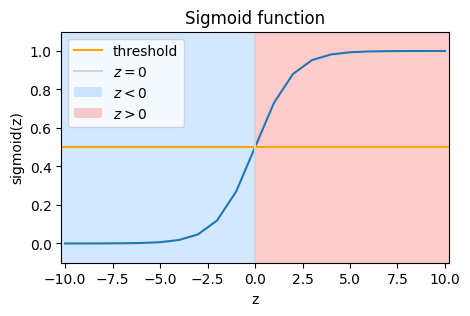

In [14]:
xmin = -10.2
xmax = 10.2
ymin = -0.1
ymax = 1.1

# plot the sigmoid function
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.plot(z_temp, y)
ax.set_title('Sigmoid function')
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# plot threshold
plt.axhline(0.5, c='orange', label='threshold')

ax.axvline(0, c='lightgray', label='$z = 0$')
ax.fill_betweenx((ymin, ymax),
                 xmin, 0,
                 facecolor='dodgerblue',
                 alpha=0.2, label='$z < 0$')
ax.fill_betweenx((ymin, ymax),
                 0, xmax,
                 facecolor='red',
                 alpha=0.2, label='$z > 0$')
ax.legend()

plt.show()

## Logistic Regression

A logistic regression model applies the sigmoid to the familiar linear regression model as show below:

$$
f_{\mathbf{w},b} = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)
$$

where

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

In [15]:
x_train = np.array([0, 1, 2, 3, 4, 5])
y_train = np.array([0, 0, 0, 1, 1, 1])

pos = (y_train == 1)
neg = (y_train == 0)

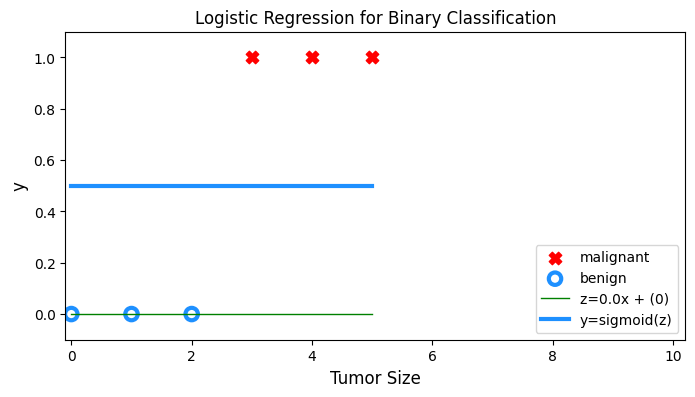

In [16]:
xmin = -0.1
xmax = 10.2
ymin = -0.1
ymax = 1.1

w_in = np.zeros(1)
b_in = 0

# plot data points
plt.figure(figsize=(8, 4))
plt.scatter(x_train[pos], y_train[pos],
            marker='X', s=80, c='red', label='malignant')
plt.scatter(x_train[neg], y_train[neg],
            marker='o', s=80, facecolors='none',
            edgecolor='dodgerblue', lw=3, label='benign')


# plot z
f_wb = np.matmul(x_train.reshape(-1, 1), w_in) + b_in
plt.plot(x_train, f_wb, color='green', lw=1, label=f'z={w_in[0]}x + ({b_in})')
# plot sigmoid(z)
plt.plot(x_train, sigmoid(f_wb), c='dodgerblue', lw=3, label='y=sigmoid(z)')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('Tumor Size', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Logistic Regression for Binary Classification')
plt.legend(loc='lower right')

plt.show()

### Gradient Descent to find $w$ and $b$

In [17]:
w_out, b_out, _ = gradient_descent(x_train.reshape(-1, 1), y_train.reshape(-1, 1), w_in.reshape(-1, 1), b_in, 0.1, 8185)

Iteration    0: Cost [0.64331581]
Iteration  819: Cost [0.12540607]
Iteration 1638: Cost [0.08718881]
Iteration 2457: Cost [0.06908096]
Iteration 3276: Cost [0.05779066]
Iteration 4095: Cost [0.04987164]
Iteration 4914: Cost [0.04393738]
Iteration 5733: Cost [0.03929551]
Iteration 6552: Cost [0.03555236]
Iteration 7371: Cost [0.03246392]


In [18]:
w_out, b_out

(array([[4.785636]]), array([-11.77039712]))

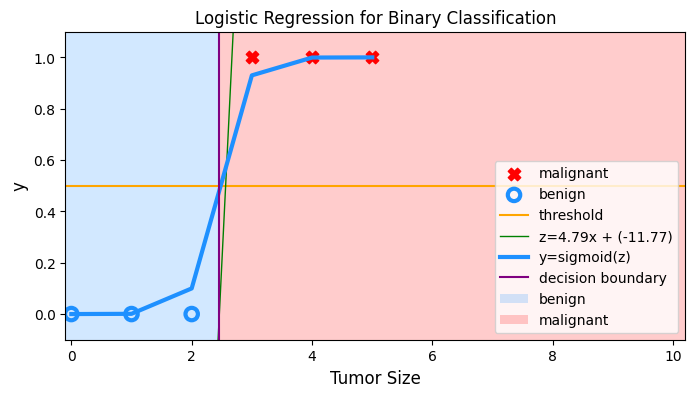

In [19]:
xmin = -0.1
xmax = 10.2
ymin = -0.1
ymax = 1.1

w_in = w_out
b_in = b_out

# plot data points
plt.figure(figsize=(8, 4))
plt.scatter(x_train[pos], y_train[pos],
            marker='X', s=80, c='red', label='malignant')
plt.scatter(x_train[neg], y_train[neg],
            marker='o', s=80, facecolors='none',
            edgecolor='dodgerblue', lw=3, label='benign')

# plot threshold
plt.axhline(0.5, c='orange', label='threshold')

# plot z
f_wb = np.matmul(x_train.reshape(-1, 1), w_in) + b_in
plt.plot(x_train, f_wb, color='green', lw=1, label=f'z={w_in[0][0].round(2)}x + ({b_in[0].round(2)})')
# plot sigmoid(z)
plt.plot(x_train, sigmoid(f_wb), c='dodgerblue', lw=3, label='y=sigmoid(z)')

# decsion boundary
decision_boundary = -b_in[0]/w_in[0][0]
plt.axvline(decision_boundary, c='purple', label='decision boundary')
plt.fill_betweenx((ymin, ymax),
                  xmin, decision_boundary,
                  facecolor='dodgerblue',
                  alpha=0.2, label='benign')
plt.fill_betweenx((ymin, ymax),
                  decision_boundary, xmax,
                  facecolor='red',
                  alpha=0.2, label='malignant')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('Tumor Size', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Logistic Regression for Binary Classification')
plt.legend(loc='lower right')

plt.show()